In [1]:
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import pandas as pd

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

def resnet(img_size=224, n_classes=3, train_base=False, lr=1e-4):
    inputs = keras.Input(shape=(img_size, img_size, 3))

    # ResNet50 backbone with Imagenet weights, no top
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    base = tf.keras.applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_tensor=x
    )
    base.trainable = train_base  # freeze by default

    x = keras.layers.GlobalAveragePooling2D()(base.output)
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(n_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# for dispaly
def plot_val_accuracy(*histories, labels=None, title="Validation Accuracy over Epochs"):
    if not histories:
        raise ValueError("Pass at least one Keras History object, e.g., `plot_val_accuracy(history)`")

    # default labels
    if labels is None:
        labels = [f"Phase {i+1}" for i in range(len(histories))]

    plt.figure(figsize=(8,5))
    epoch_start = 1
    for i, h in enumerate(histories):
        # handle both 'val_accuracy' and legacy 'val_acc' keys
        va = h.history.get("val_accuracy", h.history.get("val_acc", None))
        if va is None:
            raise KeyError("History object has no 'val_accuracy' (or 'val_acc'). "
                           "Make sure you compiled the model with metrics=['accuracy'].")

        epochs = list(range(epoch_start, epoch_start + len(va)))
        plt.plot(epochs, va, label=labels[i])
        epoch_start += len(va)

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()



In [3]:
from pathlib import Path
import tensorflow as tf

data_dir = Path.cwd() / "us_b"
img_size = (224, 224)
img_shape = (img_size, img_size, 3)
batch_size = 32
seed = 1337

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

class_names = train_ds.class_names
class_names

Found 800 files belonging to 3 classes.
Using 640 files for training.
Found 800 files belonging to 3 classes.
Using 160 files for validation.


['benign', 'malignant', 'normal']

In [4]:
from pathlib import Path
import pandas as pd
import re

base_path = Path.cwd() / "us_b"

# list classes
dir_list = [p for p in base_path.iterdir() if p.is_dir()]
print("Directories:", dir_list)

#  build dataframe
files = [f for f in dir_list[0].iterdir() if f.is_file()]  # e.g., benign
df = pd.DataFrame([f.name for f in files], columns=["filename"])

# clean function
def clean(name):
    name = re.sub(r'[benign ().]', '', str(name))
    return name

df["filename"] = df["filename"].apply(clean)
df = df[~df["filename"].str.contains("mask", regex=False)]
df_list = sorted(df["filename"].tolist())

print("Number of files:", len(df_list))
df.head()


Directories: [PosixPath('/Users/graysonrichard/Desktop/cs_2025/ultrasound/us_b/malignant'), PosixPath('/Users/graysonrichard/Desktop/cs_2025/ultrasound/us_b/benign'), PosixPath('/Users/graysonrichard/Desktop/cs_2025/ultrasound/us_b/normal')]
Number of files: 210


,filename
0,malat206p
1,malat178p
2,malat197p
3,malat51p
4,malat47p


Loaded: (798, 128, 128, 3) (798,) range: 0.0 255.0


Epoch 1/12


2025-10-21 22:42:23.640374: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 6s 203ms/step - loss: 1.4649 - accuracy: 0.4389 - val_loss: 1.2016 - val_accuracy: 0.4750
Epoch 2/12
20/20 [==============================] - 3s 141ms/step - loss: 1.2581 - accuracy: 0.5219 - val_loss: 1.1289 - val_accuracy: 0.5312
Epoch 3/12
20/20 [==============================] - 3s 138ms/step - loss: 1.1649 - accuracy: 0.5455 - val_loss: 1.0318 - val_accuracy: 0.5437
Epoch 4/12
20/20 [==============================] - 3s 136ms/step - loss: 1.0255 - accuracy: 0.5878 - val_loss: 0.9664 - val_accuracy: 0.5688
Epoch 5/12
20/20 [==============================] - 3s 137ms/step - loss: 0.9964 - accuracy: 0.6113 - val_loss: 0.9150 - val_accuracy: 0.5813
Epoch 6/12
20/20 [==============================] - 3s 133ms/step - loss: 0.9957 - accuracy: 0.6066 - val_loss: 0.8683 - val_accuracy: 0.5938
Epoch 7/12
20/20 [==============================] - 3s 138ms/step - loss: 0.9526 - accuracy: 0.6238 - val_loss: 0.8249 - val_accuracy: 0.6187
Epoch 8/12
20/20 

Epoch 1/6
20/20 [==============================] - 9s 321ms/step - loss: 0.8599 - accuracy: 0.6191 - val_loss: 0.6766 - val_accuracy: 0.7250
Epoch 2/6
20/20 [==============================] - 5s 227ms/step - loss: 0.5693 - accuracy: 0.7649 - val_loss: 0.6362 - val_accuracy: 0.7500
Epoch 3/6
20/20 [==============================] - 4s 193ms/step - loss: 0.4165 - accuracy: 0.8464 - val_loss: 0.5978 - val_accuracy: 0.7750
Epoch 4/6
20/20 [==============================] - 5s 245ms/step - loss: 0.3429 - accuracy: 0.8840 - val_loss: 0.5673 - val_accuracy: 0.7937
Epoch 5/6
20/20 [==============================] - 4s 198ms/step - loss: 0.2454 - accuracy: 0.9389 - val_loss: 0.5445 - val_accuracy: 0.7937
Epoch 6/6
20/20 [==============================] - 4s 194ms/step - loss: 0.2342 - accuracy: 0.9436 - val_loss: 0.5233 - val_accuracy: 0.7875


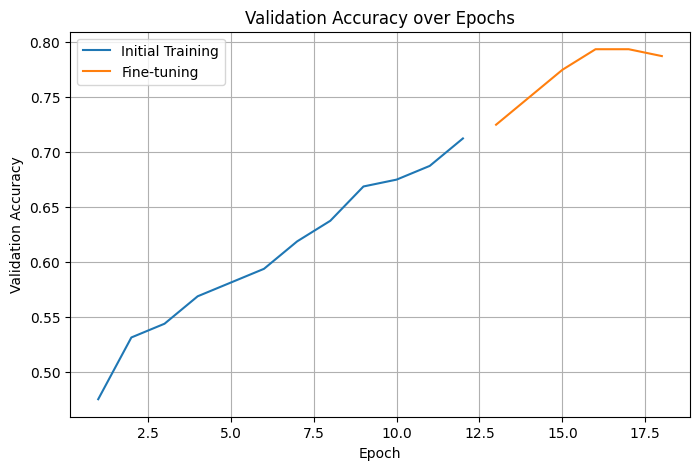

In [5]:
from pathlib import Path
import cv2, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Load images from local folder
img_size = 128
base = Path.cwd() / "us_b"     # has benign/ malignant/ normal subfolders
classes = ["benign", "malignant", "normal"]

X, y = [], []
for cls in classes:
    for p in sorted((base/cls).iterdir()):
        if not p.is_file(): 
            continue
        if p.name.endswith("_mask.png"):
            continue
        if p.suffix.lower() not in (".png",".jpg",".jpeg",".bmp",".tif",".tiff"):
            continue
        im = cv2.imread(str(p))                      # BGR
        if im is None:
            continue
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)     # RGB
        im = cv2.resize(im, (img_size, img_size))
        X.append(im)
        y.append(cls)

X = np.asarray(X, dtype=np.float32)                 # shape (N,128,128,3), values 0..255
y = np.asarray(y)
print("Loaded:", X.shape, y.shape, "range:", X.min(), X.max())  # should NOT be all zeros

# 2) Labels -> ints -> one-hot (for categorical_crossentropy)
le = LabelEncoder()
y_int = le.fit_transform(y)                         # shape (N,)
n_classes = len(le.classes_)
y_oh = tf.keras.utils.to_categorical(y_int, n_classes).astype("float32")
CLASS_NAMES = le.classes_.tolist()

# 3) Split (stratify on ints)
X_train, X_test, y_train, y_test, ytr_int, yte_int = train_test_split(
    X, y_oh, y_int, test_size=0.2, random_state=42, stratify=y_int
)

# 4) Build + train the model (resnet() should include preprocess_input inside)
model = resnet(img_size=img_size, n_classes=n_classes)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=12, batch_size=32, verbose=1
)

# Fine-tune a few top layers at low LR if needed:
for layer in model.layers[-50:]:
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="categorical_crossentropy", metrics=["accuracy"])
history_ft = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=32)

plot_val_accuracy(history, history_ft, labels=["Initial Training", "Fine-tuning"])


